# Kütüphane Kurulumu


In [ ]:
!pip install job-shop-lib==0.5

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 220.7/220.7 kB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.8/24.8 MB 52.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.3/38.3 MB 27.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.7/133.7 kB 9.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 316.6/316.6 kB 15.1 MB/s eta 0:00:00
  Attempting uninstall: pyarrow
    Found existing installation: pyarrow 17.0.0
    Uninstalling pyarrow-17.0.0:
      Successfully uninstalled pyarrow-17.0.0
  Attempting uninstall: protobuf
    Found existing installation: protobuf 3.20.3
    Uninstalling protobuf-3.20.3:
      Successfully uninstalled protobuf-3.20.3
  Attempting uninstall: absl-py
    Found existing installation: absl-py 1.4.0
    Uninstalling absl-py-1.4.0:
      Successfully uninstalled absl-py-1.4.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour i

In [ ]:
!apt update && apt-get install graphviz graphviz-dev

Hit:1 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Hit:2 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:3 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Get:4 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Get:5 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,626 B]
Get:6 https://r2u.stat.illinois.edu/ubuntu jammy InRelease [6,555 B]
Hit:7 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:8 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:9 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Get:10 http://archive.ubuntu.com/ubuntu jammy-backports InRelease [127 kB]
Get:11 https://r2u.stat.illinois.edu/ubuntu jammy/main all Packages [8,456 kB]
Get:12 https://r2u.stat.illinois.edu/ubuntu jammy/main amd64 Packages [2,611 kB]
Get:13 http://security.ubuntu.com/ubuntu jammy-security/restricted amd64 Packages 

In [ ]:
!pip install pygraphviz

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.0/106.0 kB 3.0 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for pygraphviz: filename=pygraphviz-1.14-cp310-cp310-linux_x86_64.whl size=168638 sha256=4d896c7bb30ca0ec7e43bd1ff464084a068b9430cb4245eba6f4a6764d830242
  Stored in directory: /root/.cache/pip/wheels/61/ab/cd/e24a22c32830b8b4948c8887d8714d399f0f806f206a034698
Successfully built pygraphviz


Jobshoplib'i yerine ORTools kullanmayı seçtim ama bu kodu da burada saklıyorum

In [ ]:
from job_shop_lib import JobShopInstance, Operation

Machine_1 = 0

job_1 = [Operation(machines= Machine_1, duration=7)]
job_2 = [Operation(machines= Machine_1, duration=4)]
job_3 = [Operation(machines= Machine_1, duration=5)]
job_4 = [Operation(machines= Machine_1, duration=5)]

jobs = [job_1, job_2, job_3, job_4]

instance = JobShopInstance(
    jobs,
    "Deneme",
    # lowerbound=:
)


# ORTools ile Total Tardiness implementasyonu

Solution found:
Job 1: Start = 0, End = 12
  Total Tardiness: 0
  Weighted Tardiness: 0

Job 2: Start = 12, End = 20
  Total Tardiness: 0
  Weighted Tardiness: 0

Job 3: Start = 29, End = 44
  Total Tardiness: 19
  Weighted Tardiness: 57

Job 4: Start = 20, End = 29
  Total Tardiness: 2
  Weighted Tardiness: 10

Total weighted tardiness: 67


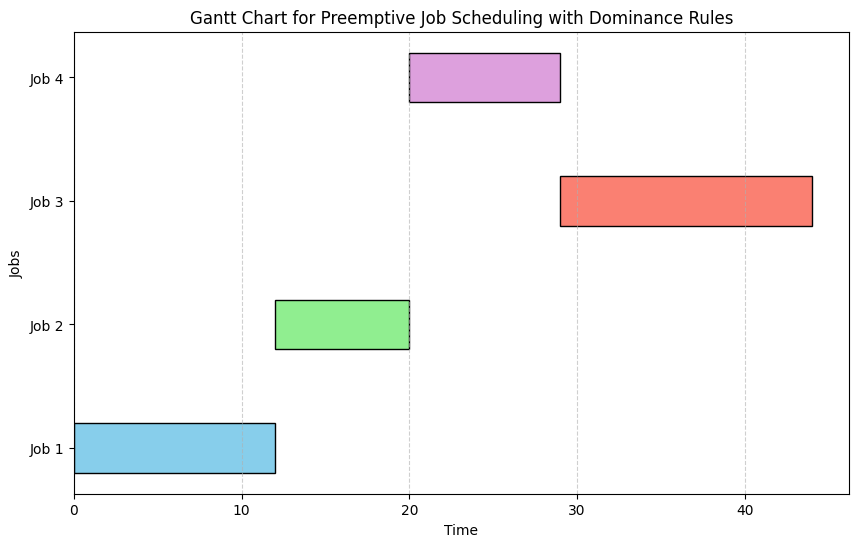

In [ ]:
from ortools.sat.python import cp_model
import matplotlib.pyplot as plt

# Define data for the problem
jobs = [
    {'id': 1, 'processing_time': 12, 'due_date': 16, 'weight': 4},
    {'id': 2, 'processing_time': 8, 'due_date': 26, 'weight': 5},
    {'id': 3, 'processing_time': 15, 'due_date': 25, 'weight': 3},
    {'id': 4, 'processing_time': 9, 'due_date': 27, 'weight': 5}
]

# Initialize the model
model = cp_model.CpModel()

# Variables for start, end, and interval for each job (allowing for fragmentation)
horizon = sum(job['processing_time'] for job in jobs)
start_vars = []
end_vars = []
interval_vars = []
tardiness_vars = []

# Create variables for each job with fragmentation allowed (intervals)
for job in jobs:
    start = model.NewIntVar(0, horizon, f'start_{job["id"]}')
    end = model.NewIntVar(0, horizon, f'end_{job["id"]}')
    interval = model.NewIntervalVar(start, job['processing_time'], end, f'interval_{job["id"]}')

    # Append variables to lists
    start_vars.append(start)
    end_vars.append(end)
    interval_vars.append(interval)

    # Define tardiness variable based on end time
    tardiness = model.NewIntVar(0, horizon, f'tardiness_{job["id"]}')
    model.Add(tardiness >= end - job['due_date'])
    model.Add(tardiness >= 0)
    tardiness_vars.append(tardiness)

# Add no-overlap constraint for all intervals to allow preemption
model.AddNoOverlap(interval_vars)

# **Apply Dominance Rule Constraints**
for j in range(len(jobs)):
    for k in range(j + 1, len(jobs)):
        job_j = jobs[j]
        job_k = jobs[k]

        # Check if the dominance rule condition applies
        if (job_j['due_date'] <= job_k['due_date'] and
            job_j['processing_time'] <= job_k['processing_time'] and
            job_j['weight'] >= job_k['weight']):

            # If rule applies, enforce job j to start before job k
            model.Add(start_vars[j] <= start_vars[k])

# Define the objective: Minimize the weighted sum of tardiness
weighted_tardiness = [job['weight'] * tardiness_vars[i] for i, job in enumerate(jobs)]
model.Minimize(sum(weighted_tardiness))

# Solve the model
solver = cp_model.CpSolver()
status = solver.Solve(model)

# Store results for Gantt chart
gantt_data = []

if status == cp_model.OPTIMAL or status == cp_model.FEASIBLE:
    print('Solution found:')
    total_weighted_tardiness = 0
    for i, job in enumerate(jobs):
        start_time = solver.Value(start_vars[i])
        end_time = solver.Value(end_vars[i])
        gantt_data.append((job['id'], start_time, end_time))  # Collect data for Gantt chart
        tardiness = solver.Value(tardiness_vars[i])
        weighted_tardiness = job['weight'] * tardiness
        total_weighted_tardiness += weighted_tardiness
        print(f"Job {job['id']}: Start = {start_time}, End = {end_time}")
        print(f"  Total Tardiness: {tardiness}")
        print(f"  Weighted Tardiness: {weighted_tardiness}")
        print()
    print("Total weighted tardiness:", total_weighted_tardiness)
else:
    print('No solution found.')

# Plot Gantt Chart
fig, ax = plt.subplots(figsize=(10, 6))

# Colors for each job
colors = ['skyblue', 'lightgreen', 'salmon', 'plum']
job_ids = list(set(job['id'] for job in jobs))

# Add bars for each job's intervals
for job_id, start, end in gantt_data:
    color = colors[job_id - 1]  # Select color based on job id
    ax.barh(f'Job {job_id}', end - start, left=start, color=color, edgecolor='black', height=0.4)

# Add labels, title, and grid
ax.set_xlabel('Time')
ax.set_ylabel('Jobs')
ax.set_title('Gantt Chart for Preemptive Job Scheduling with Dominance Rules')
plt.grid(axis='x', linestyle='--', alpha=0.6)

plt.show()
